Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student id below:

In [161]:
NAME = "Tunlaton Wongchai"
STUDENT_ID = "63070224"

---

# 1. Linear Regression

In [162]:
# Import essential libs e.g., numpy, matplotlib

import numpy as np
import matplotlib.pyplot as plt

## 1.1 Randomly generate 50 samples with seed number = 10.

In [163]:
"""Initial numpy random state and generate data (X, y)"""

random = np.random.RandomState(seed=10)

In [164]:
n = 50
X = np.random.rand(n)
y = 4 + (5 * X) + random.rand(n)

In [165]:
"""Check that the vector created is correct. The dimension must be (50,)"""
assert X.shape == y.shape == (50,)

## 1.2 Plot scatter graph of the generated samples.

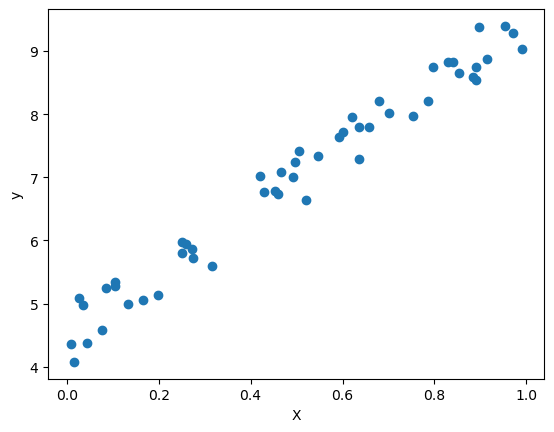

In [166]:
"""Plot scatter graph"""

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## 1.3 Write a function to calculate a cost function of Linear Regression in the following format:

Mean Squared Error (J) :

$$
J = \texttt{computeCostFunction}(X, y, \theta)
$$

_Hint :_

$$
J(\theta_0, \theta_1) = \frac{1}{2n}\sum^n_{i=1}(h(x_i)-y_i)^2
$$

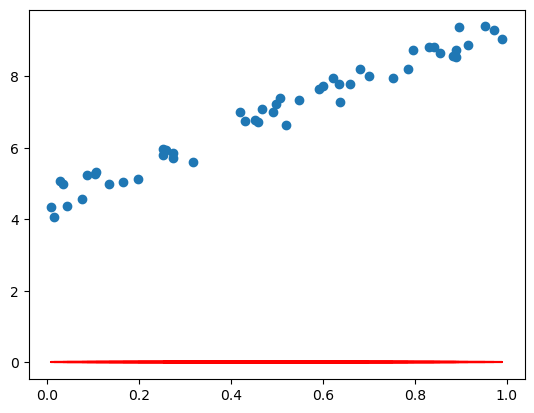

In [167]:
def computeCostFunction(X, y, theta):
    """Calculate cost function -- Mean Squared Error"""
        
    return (1/(2*n))*np.sum(np.square(linearEquation(X, theta) - y.reshape(-1, 1)))

def linearEquation(X, theta):
  
  prediction = theta[0] + theta[1]*X
  prediction = prediction.reshape(-1, 1)
  
  return prediction

theta = np.array([[0, 0]]).T
plt.scatter(X, y)
plt.plot(X, linearEquation(X, theta), color='red')
plt.show()

## 1.4 Write a function to find the optimal theta of Linear Regression
by using Gradient Descent Algorithm in the following format:


$$\begin{bmatrix} \theta, J_{History} \end{bmatrix} = \texttt{gradientDescent}(X, y, \theta, \alpha, n_{iteration})$$


where $\alpha$ is a learning rate, $n_{iteration}$ is the number of iteration, and $J_{History}$ is a vector that store $J$ for every iteration.

_Hint :_

$$
\text{Repeat until convergence :} \\
\theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j} J(\theta_0, \theta_1)\\
\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1) = \frac{\partial}{\partial\theta_j}\frac{1}{2n}\sum^n_{i=1}(h_{\theta}(x_i)-y_i)^2\\
\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1) = \frac{\partial}{\partial\theta_j}\frac{1}{2n}\sum^n_{i=1}(\theta_0 + \theta_{1}x_{i}-y_i)^2\\
\text{Objective function :}
\min_{\theta_0, \theta_1} J(\theta_0, \theta_1)\\
\text{Hypothesis (Linear Equation) :}
h(x) = \theta_0 + \theta_{1} x
$$

In [168]:
def gradientDescent(X, y, theta, alpha, n_iteration):
    """Find optimal theta of Linear Regression by using Gradient Descent algorithm"""
    j_history = [] # loss  logging
    theta_history = [] # theta logging

    temp_x = np.hstack((np.ones((n, 1)), X.reshape(-1, 1)))
    y = y.reshape(-1, 1)

    for i in range(n_iteration):
      prediction = linearEquation(X, theta)
      loss = computeCostFunction(X, y, theta)

      gradient = temp_x.T.dot(prediction - y) * (1/n)
      theta = theta - alpha*gradient

      print(f"iteration: {i+1} , loss: {loss}")
      j_history.append(loss)
      theta_history.append(theta)

    return np.array(theta_history), j_history


## 1.5 Demonstrate the equation of Linear Regression by using Gradient Descent Algorithm.
The number of iterations ($n_{iteration}$) is 100 and the Learning Rate ($\alpha$) is 0.1.

In [169]:
"""Use Gradient Descent to find optimal theta of Linear Regression"""

n_iter = 100
alpha = 0.1
theta_history, j_history = gradientDescent(X, y, theta, alpha, n_iter)

iteration: 1 , loss: 25.53860395299991
iteration: 2 , loss: 19.535042226816905
iteration: 3 , loss: 14.953856342729708
iteration: 4 , loss: 11.457921039235796
iteration: 5 , loss: 8.79001695780055
iteration: 6 , loss: 6.753891204743785
iteration: 7 , loss: 5.1998069725888865
iteration: 8 , loss: 4.013518215973402
iteration: 9 , loss: 3.107857569564459
iteration: 10 , loss: 2.4163181126862177
iteration: 11 , loss: 1.8881563955465377
iteration: 12 , loss: 1.4846561549185686
iteration: 13 , loss: 1.176277610587398
iteration: 14 , loss: 0.9404824406255707
iteration: 15 , loss: 0.7600742848935056
iteration: 16 , loss: 0.6219325853434178
iteration: 17 , loss: 0.5160465337345463
iteration: 18 , loss: 0.43477799476473566
iteration: 19 , loss: 0.3722991324560711
iteration: 20 , loss: 0.32416333131721536
iteration: 21 , loss: 0.2869778185164438
iteration: 22 , loss: 0.25815388171029147
iteration: 23 , loss: 0.23571629066708152
iteration: 24 , loss: 0.21815789009632544
iteration: 25 , loss: 0.204

## 1.6 Plot the convergence curve of the algorithm and report what you see.
Hint: Cost function value -vs- iteration number

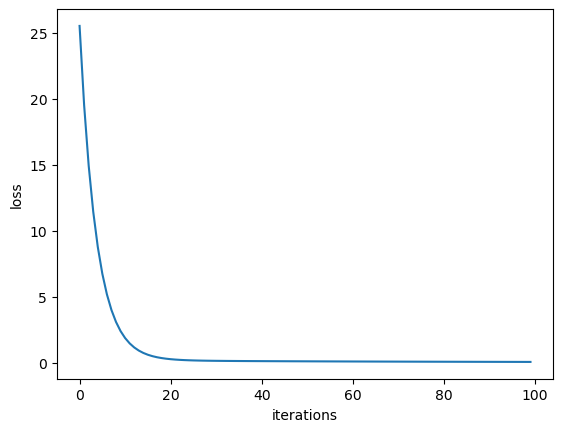

In [170]:
"""Plot the convergence graph here"""

plt.plot(j_history, )
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()

## 1.7 Demonstrate how the gradient descent work
simply plot the gradient of each iteration in $J$

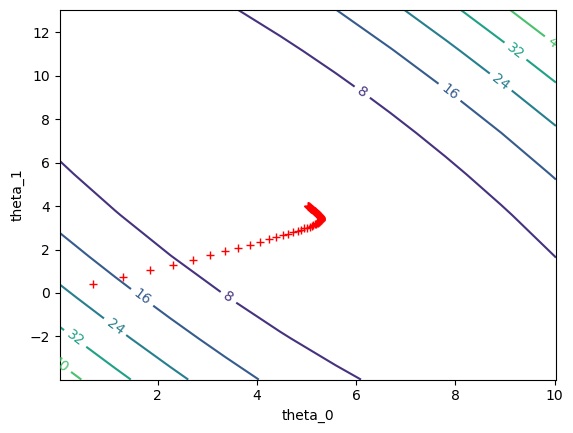

In [171]:
"""Plot contour graph to see how gradient descent work"""

theta = theta_history[-1]

theta_0_vals = np.linspace(theta[0] - 5, theta[0] + 5, 10)
theta_1_vals = np.linspace(theta[1] - 8, theta[0] + 8, 10)

M, B = np.meshgrid(theta_0_vals, theta_1_vals)

J_vals = np.array(
    [computeCostFunction(X, y, theta) for theta in zip(np.ravel(M), np.ravel(B))]
).reshape(M.shape)

cp = plt.contour(M, B, J_vals)
plt.clabel(cp, inline=1, fontsize=10)

plt.plot(theta_history[:,0], theta_history[:, 1], "r+")
plt.xlabel("theta_0")
plt.ylabel("theta_1")
plt.show()

## 1.8 Plot the linear equation on the graph created in Question 2.

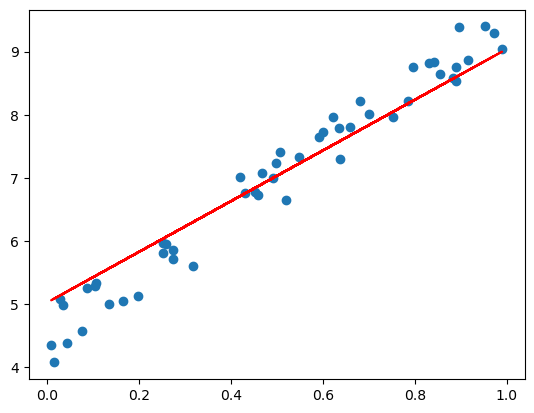

In [172]:
"""Plot the data and linear equation from optimal theta"""

plt.scatter(X, y)
plt.plot(X, linearEquation(X, theta_history[-1]), 'r')


## 1.9 Change the Learning rate $\alpha$ to 0.01 and 0.001, respectively, and observe the results.

In [173]:
"""Training with learning rate = 0.01"""
theta2 = np.array([[0, 0]]).T
theta_history_2, j_history_2 = gradientDescent(X, y, theta2, 0.01, n_iter)

iteration: 1 , loss: 25.53860395299991
iteration: 2 , loss: 24.901776210386398
iteration: 3 , loss: 24.280953634214704
iteration: 4 , loss: 23.675733820907308
iteration: 5 , loss: 23.085724484383054
iteration: 6 , loss: 22.510543201676047
iteration: 7 , loss: 21.949817164950392
iteration: 8 , loss: 21.4031829397499
iteration: 9 , loss: 20.87028622932615
iteration: 10 , loss: 20.350781644891853
iteration: 11 , loss: 19.844332481650746
iteration: 12 , loss: 19.350610500458675
iteration: 13 , loss: 18.86929571497433
iteration: 14 , loss: 18.40007618416152
iteration: 15 , loss: 17.94264781000861
iteration: 16 , loss: 17.49671414033368
iteration: 17 , loss: 17.061986176547865
iteration: 18 , loss: 16.638182186251925
iteration: 19 , loss: 16.225027520544664
iteration: 20 , loss: 15.822254435924764
iteration: 21 , loss: 15.42960192067039
iteration: 22 , loss: 15.046815525584186
iteration: 23 , loss: 14.673647198993715
iteration: 24 , loss: 14.309855125900476
iteration: 25 , loss: 13.955203571

In [174]:
"""Training with learning rate = 0.001"""
theta3 = np.array([[0, 0]]).T
theta_history_3, j_history_3 = gradientDescent(X, y, theta3, 0.001, n_iter)

iteration: 1 , loss: 25.53860395299991
iteration: 2 , loss: 25.474556463038606
iteration: 3 , loss: 25.410670863939988
iteration: 4 , loss: 25.34694674634423
iteration: 5 , loss: 25.283383701926656
iteration: 6 , loss: 25.219981323395103
iteration: 7 , loss: 25.156739204487327
iteration: 8 , loss: 25.093656939968366
iteration: 9 , loss: 25.030734125627973
iteration: 10 , loss: 24.967970358278023
iteration: 11 , loss: 24.905365235749912
iteration: 12 , loss: 24.842918356892
iteration: 13 , loss: 24.780629321567016
iteration: 14 , loss: 24.718497730649506
iteration: 15 , loss: 24.65652318602328
iteration: 16 , loss: 24.594705290578844
iteration: 17 , loss: 24.533043648210874
iteration: 18 , loss: 24.471537863815644
iteration: 19 , loss: 24.410187543288558
iteration: 20 , loss: 24.348992293521523
iteration: 21 , loss: 24.28795172240055
iteration: 22 , loss: 24.22706543880312
iteration: 23 , loss: 24.166333052595775
iteration: 24 , loss: 24.10575417463155
iteration: 25 , loss: 24.045328416

## 1.10 Plot the convergence curves corresponds to Question 9.

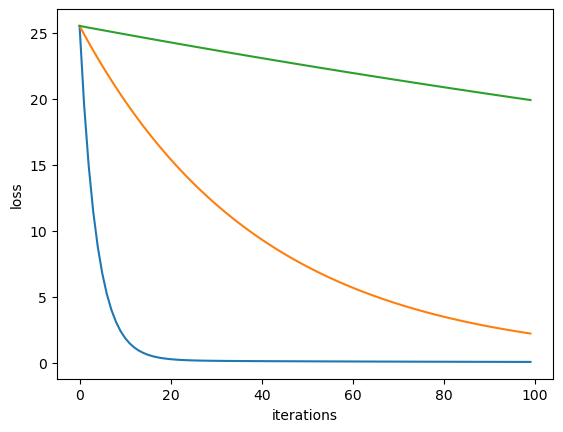

In [175]:
"""Plot the convergence curves of each learning rate 0.01 and 0.001"""
plt.plot(j_history, )
plt.plot(j_history_2 )
plt.plot(j_history_3 )
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()

## 1.11 Observe the gradient of each $\alpha$.

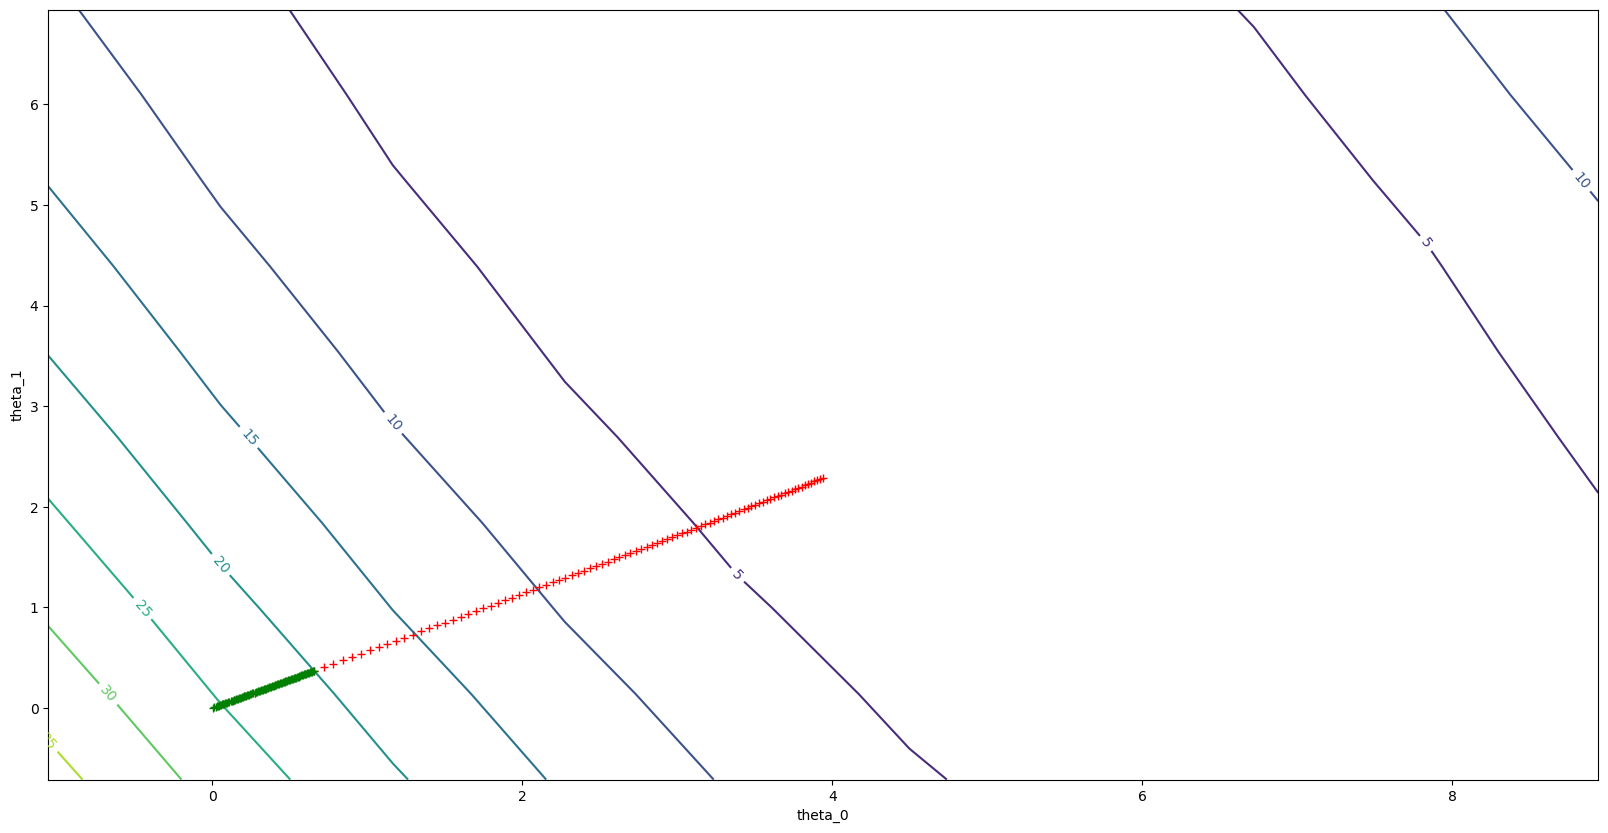

In [176]:

"""Plot the gradient of each learning rate 0.01 and 0.001"""

theta2 = theta_history_2[-1]
theta3 = theta_history_3[-1]

theta_0_vals = np.linspace(theta2[0] - 5, theta2[0] + 5, 10)
theta_1_vals = np.linspace(theta2[1] - 3, theta2[0] + 3, 10)

M, B = np.meshgrid(theta_0_vals, theta_1_vals)

J_vals = np.array(
    [computeCostFunction(X, y, theta) for theta in zip(np.ravel(M), np.ravel(B))]
).reshape(M.shape)

plt.figure(figsize=(20, 10))
cp = plt.contour(M, B, J_vals)
plt.clabel(cp, inline=1, fontsize=10)

plt.plot(theta_history_2[:,0], theta_history_2[:, 1], "r+")
plt.plot(theta_history_3[:,0], theta_history_3[:, 1], "g+")
plt.xlabel("theta_0")
plt.ylabel("theta_1")
plt.show()

## 1.12 Change the number of iterations to 1000 and observe the result.

In [177]:
"""Training for 1000 iterations"""
theta4 = np.array([[0, 0]]).T
theta_history_4, j_history_4 = gradientDescent(X, y, theta3, 0.001, 1000)

iteration: 1 , loss: 19.872890810297108
iteration: 2 , loss: 19.82316367218859
iteration: 3 , loss: 19.773562214375385
iteration: 4 , loss: 19.724086119062303
iteration: 5 , loss: 19.674735069257707
iteration: 6 , loss: 19.625508748771562
iteration: 7 , loss: 19.57640684221336
iteration: 8 , loss: 19.527429034990107
iteration: 9 , loss: 19.47857501330432
iteration: 10 , loss: 19.42984446415201
iteration: 11 , loss: 19.381237075320648
iteration: 12 , loss: 19.332752535387222
iteration: 13 , loss: 19.284390533716177
iteration: 14 , loss: 19.236150760457473
iteration: 15 , loss: 19.18803290654456
iteration: 16 , loss: 19.140036663692435
iteration: 17 , loss: 19.09216172439563
iteration: 18 , loss: 19.044407781926267
iteration: 19 , loss: 18.996774530332075
iteration: 20 , loss: 18.94926166443444
iteration: 21 , loss: 18.90186887982644
iteration: 22 , loss: 18.854595872870902
iteration: 23 , loss: 18.80744234069845
iteration: 24 , loss: 18.760407981205564
iteration: 25 , loss: 18.713492493

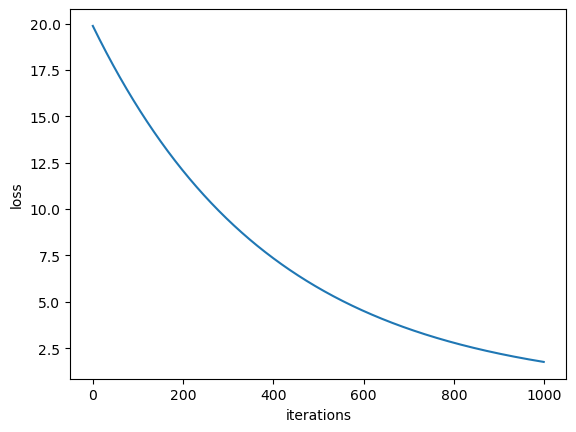

In [178]:
"""Plot the convergence curves and gradient"""
plt.plot(j_history_4)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()

# 2. Linear Regression -- Multi-Variable

Each residence in Boston is described by 13 features ($I_1$ − $I_{13}$). The task is to employ the linear regression algorithm to predict the value of owner-occupied home in Boston ($O_{14}$). The dataset–Boston Housing Data–can be download at https://bit.ly/2NBaO7e. The details of the data are as follows:

- $I_1$: CRIM—per capita crime rate by town
- $I_2$: ZN—-Proportion of residential land zoned for lots over 25,000 sq.ft.
- $I_3$: INDUS—Proportion of non-retail business acres per town
- $I_4$: CHAS—Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- $I_5$: NOX—Nitric Oxides Concentration (parts per 10 million)
- $I_6$: RM—Average number of rooms per dwelling
- $I_7$: AGE—Proportion of owner-occupied units built prior to 1940
- $I_8$: DIS—Weighted distances to five Boston employment centres
- $I_9$: RAD—Index of accessibility to radial highways
- $I_{10}$: TAX—full-value property-tax rate per \$10,000
- $I_{11}$: PTRATIO—Pupil-teacher ratio by town
- $I_{12}$: Black—1000(Bk − 0.63)2 where Bk is the proportion of blacks by town
- $I_{13}$: LSTAT—% lower status of the population
- $O_{14}$: MEDV—Median value of owner-occupied homes in $1000’s


## 2.1 Import `regression-datasets-housing.csv` file to python

In [179]:
"""
Load regression-datasets-housing.csv

hint: np.genfromtxt()
"""
data = np.genfromtxt('regression-datasets-housing.csv', delimiter=',')
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [180]:
"""Check loaded data"""
assert data.shape == (506, 14)

## 2.2 Assign values from column 1 to column 13 to $X$ and value from column 14 to $y$, then convert both variables to numpy.

In [181]:
"""Assign values X2 and y2"""
# YOUR CODE HERE
X2 = data[:, 0:13]
y2 = data[:, 13].reshape(506, 1)
n = 506

In [182]:
"""Check the shape of X2 and y2"""
assert X2.shape == (506, 13)
assert y2.shape == (506, 1)

## 2.3 Follow the exercise 3 to 7 in Section 1

In [183]:
"""
We will check all below processes manually for this section.
Please complete the process of calculating and observe the result by follow the exercise 3 - 7.
"""

def computeCostFunction(X, y, theta):
    y_pred = linearEquation(X, theta)
    cost = (1/(2*n))*np.sum(np.square(y_pred - y.reshape(-1, 1)))
    return cost

def linearEquation(X, theta):
    prediction = X.dot(theta)
    prediction = prediction.reshape(-1, 1)
    return prediction

def gradientDescent(X, y, theta, alpha, n_iteration):
    j_history = [] # loss  logging
    theta_history = [] # theta logging

    X = np.hstack((np.ones((n, 1)), X))
    for i in range(n_iteration):
        y_pred = linearEquation(X, theta)
        loss = computeCostFunction(X, y, theta)

        error = y_pred - y
        weight_gradient = 1/n * X.T.dot(error)
        theta = theta - alpha*weight_gradient.flatten()

        print(f"iteration: {i+1} , loss: {loss}")
        j_history.append(loss)
        theta_history.append(theta)

    return theta_history, j_history

In [184]:
theta = np.zeros(X2.shape[1] + 1)
alpha = 0.01 # learning rate
n_iter = 100

theta_history, j_history = gradientDescent(X2, y2, theta,alpha, n_iter)

iteration: 1 , loss: 296.0734584980237
iteration: 2 , loss: 2225167266.7244673
iteration: 3 , loss: 2.1771561508559964e+16
iteration: 4 , loss: 2.1316430703931678e+23
iteration: 5 , loss: 2.0870894217583315e+30
iteration: 6 , loss: 2.0434670362495286e+37
iteration: 7 , loss: 2.0007564051652104e+44
iteration: 8 , loss: 1.958938471627716e+51
iteration: 9 , loss: 1.9179945773090124e+58
iteration: 10 , loss: 1.877906453861249e+65
iteration: 11 , loss: 1.8386562147644507e+72
iteration: 12 , loss: 1.8002263473459068e+79
iteration: 13 , loss: 1.7625997049663573e+86
iteration: 14 , loss: 1.7257594993695228e+93
iteration: 15 , loss: 1.6896892931914957e+100
iteration: 16 , loss: 1.6543729926267366e+107
iteration: 17 , loss: 1.619794840247331e+114
iteration: 18 , loss: 1.585939407972338e+121
iteration: 19 , loss: 1.5527915901840987e+128
iteration: 20 , loss: 1.5203365969884025e+135
iteration: 21 , loss: 1.488559947615529e+142
iteration: 22 , loss: 1.4574474639592244e+149
iteration: 23 , loss: 1.4

C:\Users\tunza\AppData\Local\Temp\ipykernel_11344\2411870190.py:8: RuntimeWarning: overflow encountered in square
  cost = (1/(2*n))*np.sum(np.square(y_pred - y.reshape(-1, 1)))


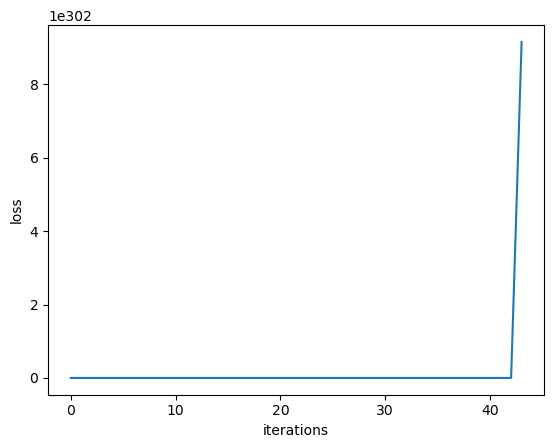

In [185]:
plt.plot(j_history, )
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()

## 2.4 Normalise this data to zero-mean & unit standard deviation

In [186]:
"""Normalise this data"""

normed_X = (X2 - X2.mean(axis=0)) / X2.std(axis=0)

In [187]:
normed_X

array([[-0.41978194,  0.2856537 , -1.2879095 , ..., -1.35319222,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.4872916 , -0.59338101, ..., -0.47535214,
         0.44105193, -0.49243937],
       [-0.41734159, -0.4872916 , -0.59338101, ..., -0.47535214,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.4872916 ,  0.11573841, ...,  1.28032803,
         0.44105193, -0.98304761],
       [-0.40776407, -0.4872916 ,  0.11573841, ...,  1.28032803,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.4872916 ,  0.11573841, ...,  1.28032803,
         0.44105193, -0.66905833]])

## 2.5 Train a model with normalised data and compare the result with Question 3.

In [188]:
"""Set hyperparameters and train model. Then, compare the result with Q.3"""
theta = np.zeros(X2.shape[1] + 1)
alpha = 0.01 # learning rate
n_iter = 100

theta_history, j_history = gradientDescent(normed_X, y2, theta,alpha, n_iter)

iteration: 1 , loss: 296.0734584980237
iteration: 2 , loss: 288.8095740687867
iteration: 3 , loss: 281.87788326779696
iteration: 4 , loss: 275.2495650652942
iteration: 5 , loss: 268.89901227596414
iteration: 6 , loss: 262.80345338851674
iteration: 7 , loss: 256.9426193240849
iteration: 8 , loss: 251.2984497767318
iteration: 9 , loss: 245.85483442582014
iteration: 10 , loss: 240.59738487069438
iteration: 11 , loss: 235.51323363207544
iteration: 12 , loss: 230.59085699971544
iteration: 13 , loss: 225.81991888920547
iteration: 14 , loss: 221.19113320853955
iteration: 15 , loss: 216.6961425325467
iteration: 16 , loss: 212.32741114539567
iteration: 17 , loss: 208.07813074226655
iteration: 18 , loss: 203.94213728469109
iteration: 19 , loss: 199.9138376832544
iteration: 20 , loss: 195.9881451392105
iteration: 21 , loss: 192.1604221156343
iteration: 22 , loss: 188.42643003124314
iteration: 23 , loss: 184.78228487795397
iteration: 24 , loss: 181.22441805832048
iteration: 25 , loss: 177.74954182

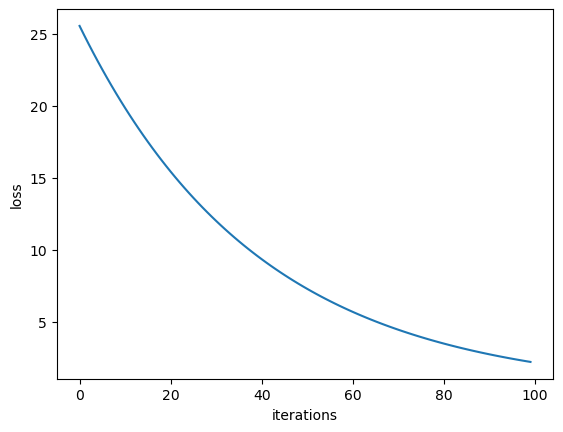

In [189]:
plt.plot(j_history_2)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()

## 2.6 Re-write the Gradient Descent function in vector format in order to decrease the number of loops

_Hint :_ The properties of matrix

In [190]:
# combine together

def MultipleLinearRegression(X, y, theta, alpha, n_iteration):
    theta_history = []
    j_history = []

    m, n = X.shape # row, col
    X = np.hstack((np.ones((m, 1)), X)) # make array ready for dot product
    y = y.flatten()

    for i in range(n_iteration):
        y_pred = X.dot(theta)
        error = y_pred - y
        loss = 1/(2*m) * error.T.dot(error) # compute cost using dot product instead of numpy sum and square

        weight_gradient = (1/m) * X.T.dot(error)
        print(f"iteration: {i+1} , loss: {loss}")
        theta = theta - alpha * weight_gradient

        theta_history.append(theta)
        j_history.append(loss)

    return theta_history, j_history

In [191]:
theta = np.zeros(normed_X.shape[1] + 1) # define initial theta and bias
alpha = 0.1
n_iter = 100

theta_history, j_history = MultipleLinearRegression(normed_X, y2, theta, alpha, n_iter)

iteration: 1 , loss: 296.0734584980237
iteration: 2 , loss: 231.25784910084914
iteration: 3 , loss: 187.75160688136316
iteration: 4 , loss: 153.91900464482845
iteration: 5 , loss: 126.77308410980335
iteration: 6 , loss: 104.85813873309509
iteration: 7 , loss: 87.14224079565415
iteration: 8 , loss: 72.81418231333738
iteration: 9 , loss: 61.22259116914166
iteration: 10 , loss: 51.842220388215274
iteration: 11 , loss: 44.24909855508394
iteration: 12 , loss: 38.100865977286254
iteration: 13 , loss: 33.120989692969786
iteration: 14 , loss: 29.086053807209286
iteration: 15 , loss: 25.815517023050326
iteration: 16 , loss: 23.16345466429461
iteration: 17 , loss: 21.011898302578004
iteration: 18 , loss: 19.265462183730513
iteration: 19 , loss: 17.847006550356834
iteration: 20 , loss: 16.69413680925636
iteration: 21 , loss: 15.7563767139977
iteration: 22 , loss: 14.992885243994774
iteration: 23 , loss: 14.370612192499163
iteration: 24 , loss: 13.862807850036264
iteration: 25 , loss: 13.447818565

In [192]:
import time

theta = np.zeros(normed_X.shape[1] + 1) # define initial theta and bias
alpha = 0.1
n_iter = 100

# test new function
start = time.time()
theta_history, j_history = MultipleLinearRegression(normed_X, y2, theta, alpha, n_iter)
end = time.time()
new_func = end - start

iteration: 1 , loss: 296.0734584980237
iteration: 2 , loss: 231.25784910084914
iteration: 3 , loss: 187.75160688136316
iteration: 4 , loss: 153.91900464482845
iteration: 5 , loss: 126.77308410980335
iteration: 6 , loss: 104.85813873309509
iteration: 7 , loss: 87.14224079565415
iteration: 8 , loss: 72.81418231333738
iteration: 9 , loss: 61.22259116914166
iteration: 10 , loss: 51.842220388215274
iteration: 11 , loss: 44.24909855508394
iteration: 12 , loss: 38.100865977286254
iteration: 13 , loss: 33.120989692969786
iteration: 14 , loss: 29.086053807209286
iteration: 15 , loss: 25.815517023050326
iteration: 16 , loss: 23.16345466429461
iteration: 17 , loss: 21.011898302578004
iteration: 18 , loss: 19.265462183730513
iteration: 19 , loss: 17.847006550356834
iteration: 20 , loss: 16.69413680925636
iteration: 21 , loss: 15.7563767139977
iteration: 22 , loss: 14.992885243994774
iteration: 23 , loss: 14.370612192499163
iteration: 24 , loss: 13.862807850036264
iteration: 25 , loss: 13.447818565

In [193]:
theta = np.zeros(X2.shape[1] + 1)
alpha = 0.1 # learning rate
n_iter = 100

# test old function
start = time.time()
theta_history, j_history = gradientDescent(normed_X, y2, theta,alpha, n_iter)
end = time.time()
old_func = end - start

iteration: 1 , loss: 296.0734584980237
iteration: 2 , loss: 231.25784910084914
iteration: 3 , loss: 187.75160688136316
iteration: 4 , loss: 153.91900464482842
iteration: 5 , loss: 126.77308410980335
iteration: 6 , loss: 104.85813873309507
iteration: 7 , loss: 87.14224079565413
iteration: 8 , loss: 72.81418231333735
iteration: 9 , loss: 61.22259116914165
iteration: 10 , loss: 51.84222038821527
iteration: 11 , loss: 44.24909855508394
iteration: 12 , loss: 38.100865977286254
iteration: 13 , loss: 33.120989692969786
iteration: 14 , loss: 29.086053807209282
iteration: 15 , loss: 25.81551702305033
iteration: 16 , loss: 23.163454664294605
iteration: 17 , loss: 21.011898302578004
iteration: 18 , loss: 19.265462183730516
iteration: 19 , loss: 17.847006550356834
iteration: 20 , loss: 16.694136809256364
iteration: 21 , loss: 15.7563767139977
iteration: 22 , loss: 14.99288524399477
iteration: 23 , loss: 14.370612192499163
iteration: 24 , loss: 13.862807850036264
iteration: 25 , loss: 13.4478185652

In [194]:
print(f"new function time: {new_func}")
print(f"old function time: {old_func}")

new function time: 0.005991697311401367
old function time: 0.012998819351196289
